# ¿Qué factores médicos, psicológicos y/o alimenticios pueden estimular el desarrollo de bruxismo en adultos jóvenes?


---



## 1. Contextualización

El bruxismo, es el habito involuntario presente en una parte de la población el cual consiste en apretar rechinar los dientes, lo que puede traer consigo problemas tanto físicos (como en el desgaste del esmalte de los dientes) como mentales.


Con la finalidad de poder explicar una posible correlación entre distintas condiciones medicas y el desarrollo de esta enfermedad, se utilizara la base de datos públicos presentes dentro de “Hardvard Dataverse” ([Prevalence of Bruxism Among Young Adult Energy Drink Consumers in Jordan](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/ZE290H)).


Este dataset se compone de preguntas de carácter medico de cada uno de los entrevistados, las cuales serán analizadas con el fin de intentar descubrir una correlación entre distintas enfermedades y el desarrollo del bruxismo.


Debido al tipo de datos recolectados en el momento de realizar la encuesta, esta base de datos carece de variables continuas sobre las cuales se pueda realizar un análisis pertinente, por lo cual el análisis que se abordara en el presente documento se centrara principalmente en el entendimiento de todas las variables categóricas y su posible relación con el desarrollo del Bruxismo.


## 2. Carga de datos

In [20]:
# Librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [21]:
# Datos
# URL directa al archivo .xlsx que contiene los datos
url = "/content/E.D.R. (4).xlsx"

df = pd.read_excel(url)
print("¡Archivo cargado con éxito!")


¡Archivo cargado con éxito!


In [22]:
df.head()

,Timestamp,أوافق على المشاركة بالدراسة\nI agree on taking part of this study,Gender الجنس,Age العمر,Occupation الوظيفة,Do you drink coffee daily?\nهل تشرب القهوة يومياً؟,Do have any of the following medical conditions ?\nهل تعاني من أي من الحالات الطبية التالية؟ [Parkinson's disease الشلل الرعاش],Do have any of the following medical conditions ?\nهل تعاني من أي من الحالات الطبية التالية؟ [dementia الخرف],Do have any of the following medical conditions ?\nهل تعاني من أي من الحالات الطبية التالية؟ [gastroesophageal reflux disorder (GERD) ارتجاع المريء المرضي ],Do have any of the following medical conditions ?\nهل تعاني من أي من الحالات الطبية التالية؟ [epilepsy الصرع],...,Do drink energy drinks regularly ?\nهل تشرب مشروبات الطاقة بانتظام (بشكل اعتيادي) ؟,How long have you been consuming energy drinks? \nمنذ متى و أنت تستهلك مشروبات الطاقة؟,How many cans you drink daily?\nكم علبة مشروب تشرب يومياً؟,what's your favorite brand?\nما هو نوعك المفضل؟,Energy drinks are essentially for me and can't be dispensed \nمشروبات الطاقة أساسية لدي ولا يمكنني الاستغناء عنها,Have you been diagnosed by a dentist with bruxism? \nهل تم تشخيصك من قبل طبيب الأسنان بصرير الأسنان؟,Do you find pain in your jaw when you wake up?\nهل لاحظت وجود ألم في فكك عند الاستيقاظ؟,Do you think that you have Bruxism?\nهل تعتقد بأن لديك مشكلة صرير الأسنان؟,Do you have any of the following signs inside or outside your mouth?\nهل لديك أي من الأعراض/ العلامات التالية داخل أو خارج فمك؟,If you have any of the signs mentioned above have you sought medical help or treatments? \nإذا كانت لديك أي من العلامات المذكورة أعلاه ، فهل طلبت المساعدة الطبية أو العلاج؟
0,2023-06-04 13:00:52.643,أوافق Agree,male ذكر,18-20,university student طالب جامعي,"Yes, 1-2 cups daily نعم, من ...",No لا,No لا,No لا,No لا,...,Yes نعم,Less than 6 months ...,1 can daily علبة واحدة يومياً,redbull,3,Yes نعم,Yes نعم,maybe ربما,Any sound you hear during opening or closing y...,No لا
1,2023-06-04 13:20:11.011,أوافق Agree,female انثى,20-22,university student طالب جامعي,"Yes, 1-2 cups daily نعم, من ...",No لا,No لا,No لا,No لا,...,Yes نعم,For more than 4 years ...,3 cans daily ثلاث علب يومياً,Boom Boom,5,No لا,No لا,maybe ربما,I don't have any of the previous signs ...,No لا
2,2023-06-04 13:38:18.528,أوافق Agree,female انثى,20-22,university student طالب جامعي,"Yes, 1-2 cups daily نعم, من ...",No لا,No لا,No لا,No لا,...,Yes نعم,2-4 years ...,1 can daily علبة واحدة يومياً,redbull,1,No لا,No لا,No لا,Any sound you hear during opening or closing y...,No لا
3,2023-06-04 13:41:18.367,أوافق Agree,male ذكر,18-20,secondary school student طالب مدرسة ثانوية,"Yes, 1-2 cups daily نعم, من ...",No لا,No لا,No لا,No لا,...,Yes نعم,Never ...,None ولا واحدة,NaN,1,Yes نعم,Yes نعم,maybe ربما,Any pain during opening or closing your mouth ...,Yes نعم
4,2023-06-04 13:48:24.148,أوافق Agree,female انثى,18-20,university student طالب جامعي,"Yes, 3-4 cups daily نعم, من ...",No لا,No لا,No لا,No لا,...,Yes نعم,6 months - 1 year ...,1 can daily علبة واحدة يومياً,redbull,2,Yes نعم,Yes نعم,Yes نعم,Any pain during opening or closing your mouth ...,Yes نعم


In [23]:
df.shape

(1597, 33)

## 3. Exploración inicial

In [24]:
basic_inf = pd.DataFrame({"Columna": df.columns, "Tipo": df.dtypes.values, "Valores nulos": df.isna().sum().values,
                         "Registros no nulos": df.notna().sum().values,"Datos únicos": df.nunique().tolist()})
basic_inf

,Columna,Tipo,Valores nulos,Registros no nulos,Datos únicos
0,Timestamp,datetime64[ns],0,1597,1597
1,أوافق على المشاركة بالدراسة\nI agree on taking...,object,0,1597,1
2,Gender الجنس,object,0,1597,2
3,Age العمر,object,0,1597,7
4,Occupation الوظيفة,object,0,1597,5
5,Do you drink coffee daily?\nهل تشرب القهوة يوم...,object,0,1597,5
6,Do have any of the following medical condition...,object,0,1597,2
7,Do have any of the following medical condition...,object,0,1597,2
8,Do have any of the following medical condition...,object,0,1597,2
9,Do have any of the following medical condition...,object,0,1597,2


In [25]:
for col in df.columns:
    if(col != "Timestamp"):
        unicos = df[col].dropna().unique()
        print(f"\nColumna: {col}")
        for valor in unicos:
            print(f"  - {str(valor).strip().replace(chr(10), ' ').replace(chr(9), ' ')}")


Columna: أوافق على المشاركة بالدراسة
I agree on taking part of this study
  - أوافق   Agree

Columna: Gender       الجنس
  - male           ذكر
  - female       انثى

Columna: Age      العمر
  - 18-20
  - 20-22
  - 24-26
  - >30
  - 22-24
  - 28-30
  - 26-28

Columna: Occupation       الوظيفة
  - university student     طالب جامعي
  - secondary school student     طالب مدرسة ثانوية
  - employee in Private sector     موظف في القطاع الخاص
  - employee in Public sector      موظف في القطاع العام
  - others    أخرى

Columna: Do you drink coffee daily?
هل تشرب القهوة يومياً؟
  - Yes, 1-2 cups daily                   نعم, من فنجان الى فنجانين يومياً
  - Yes, 3-4 cups daily                   نعم, من 3 الى 4 فناجين يومياً
  - No    لا
  - Yes, more than 4 cups daily   نعم, أكثر من 4 فناجين يومياً
  - Yes, 2-3 cups daily  نعم من 2-3 فناجين يومياُ

Columna: Do have any of the following medical conditions ?
هل تعاني من أي من الحالات الطبية التالية؟ [Parkinson's disease      الشلل الرعاش]
  - No  لا

## 4. Limpieza de datos

In [26]:
clean_df = df.copy()
clean_df.drop(columns=["Timestamp", "أوافق على المشاركة بالدراسة\nI agree on taking part of this study"], inplace=True)

#### Renombre de columnas

In [27]:
col_names = ['Gender',
 'Age',
 'Occupation',
 'Do you drink coffee daily?',
 "Do you have Parkinson's disease?",
 'Do you have dementia?',
 'Do you have gastroesophageal reflux disorder (GERD)?',
 'Do you have epilepsy?',
 'Do you have sleep apnea?',
 'Do you have (ADHD?)',
 'In the last month, how often have you been upset because of something that happened unexpectedly?',
 'In the last month, how often have you felt that you were unable to control the important things in your life?',
 'In the last month, how often have you felt nervous and stressed?',
 'In the last month, how often have you felt confident about your ability to handle your personal problems?',
 'In the last month, how often have you felt that things were going your way?',
 'In the last month, how often have you found that you could not cope with all the things that you had to do?',
 'In the last month, how often have you been able to control irritations in your life?',
 'In the last month, how often have you felt that you were on top of things?',
 'In the last month, how often have you been angered because of things that happened that were outside of your control?',
 'In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?',
 'Do you take drugs or drink alcohol?',
 'Do you drink energy drinks regularly?',
 'How long have you been consuming energy drinks?',
 'How many cans you drink daily?',
 "what's your favorite brand?",
 "Energy drinks are essentially for me and can't be dispensed",
 'Have you been diagnosed by a dentist with bruxism?',
 'Do you find pain in your jaw when you wake up?',
 'Do you think that you have Bruxism?',
 'Do you have any of the following signs inside or outside your mouth?',
 'If you have any of the signs mentioned above have you sought medical help or treatments?']
clean_df.columns = col_names

#### Mapeo de respuestas

In [28]:
ans_map = {
    'Yes       نعم': 'sí',
    'No        لا': 'no'
}
clean_df['Have you been diagnosed by a dentist with bruxism?'] = clean_df["Have you been diagnosed by a dentist with bruxism?"].replace(ans_map)
clean_df['Do you find pain in your jaw when you wake up?'] = clean_df["Do you find pain in your jaw when you wake up?"].replace(ans_map)
clean_df['Do you have any of the following signs inside or outside your mouth?'] = clean_df["Do you have any of the following signs inside or outside your mouth?"].replace(ans_map)
clean_df['If you have any of the signs mentioned above have you sought medical help or treatments?'] = clean_df["If you have any of the signs mentioned above have you sought medical help or treatments?"].replace(ans_map)
clean_df['Do you find pain in your jaw when you wake up?'] = clean_df["Do you find pain in your jaw when you wake up?"].replace(ans_map)
clean_df['Do you drink energy drinks regularly?'] = clean_df["Do you drink energy drinks regularly?"].replace(ans_map)
clean_df["Do you have Parkinson's disease?"] =  clean_df["Do you have Parkinson's disease?"].replace(ans_map)
clean_df["Do you have dementia?"] =  clean_df["Do you have dementia?"].replace(ans_map)
clean_df["Do you have gastroesophageal reflux disorder (GERD)?"] =  clean_df["Do you have gastroesophageal reflux disorder (GERD)?"].replace(ans_map)
clean_df["Do you have epilepsy?"] =  clean_df["Do you have epilepsy?"].replace(ans_map)
clean_df["Do you have sleep apnea?"] =  clean_df["Do you have sleep apnea?"].replace(ans_map)
clean_df["Do you have (ADHD?)"] =  clean_df["Do you have Parkinson's disease?"].replace(ans_map)

#### Creación de una nueva categoría para los datos faltantes de la variable objetivo

In [29]:
clean_df["Have you been diagnosed by a dentist with bruxism?"] = clean_df["Have you been diagnosed by a dentist with bruxism?"].fillna("No sabe / No responde")

#### Datos limpios

In [34]:
clean_df.head()

,Gender,Age,Occupation,Do you drink coffee daily?,Do you have Parkinson's disease?,Do you have dementia?,Do you have gastroesophageal reflux disorder (GERD)?,Do you have epilepsy?,Do you have sleep apnea?,Do you have (ADHD?),...,Do you drink energy drinks regularly?,How long have you been consuming energy drinks?,How many cans you drink daily?,what's your favorite brand?,Energy drinks are essentially for me and can't be dispensed,Have you been diagnosed by a dentist with bruxism?,Do you find pain in your jaw when you wake up?,Do you think that you have Bruxism?,Do you have any of the following signs inside or outside your mouth?,If you have any of the signs mentioned above have you sought medical help or treatments?
0,male ذكر,18-20,university student طالب جامعي,"Yes, 1-2 cups daily نعم, من ...",No لا,No لا,No لا,No لا,No لا,No لا,...,Yes نعم,Less than 6 months ...,1 can daily علبة واحدة يومياً,redbull,3,sí,sí,maybe ربما,Any sound you hear during opening or closing y...,no
1,female انثى,20-22,university student طالب جامعي,"Yes, 1-2 cups daily نعم, من ...",No لا,No لا,No لا,No لا,No لا,No لا,...,Yes نعم,For more than 4 years ...,3 cans daily ثلاث علب يومياً,Boom Boom,5,no,no,maybe ربما,I don't have any of the previous signs ...,no
2,female انثى,20-22,university student طالب جامعي,"Yes, 1-2 cups daily نعم, من ...",No لا,No لا,No لا,No لا,No لا,No لا,...,Yes نعم,2-4 years ...,1 can daily علبة واحدة يومياً,redbull,1,no,no,No لا,Any sound you hear during opening or closing y...,no
3,male ذكر,18-20,secondary school student طالب مدرسة ثانوية,"Yes, 1-2 cups daily نعم, من ...",No لا,No لا,No لا,No لا,No لا,No لا,...,Yes نعم,Never ...,None ولا واحدة,NaN,1,sí,sí,maybe ربما,Any pain during opening or closing your mouth ...,sí
4,female انثى,18-20,university student طالب جامعي,"Yes, 3-4 cups daily نعم, من ...",No لا,No لا,No لا,No لا,No لا,No لا,...,Yes نعم,6 months - 1 year ...,1 can daily علبة واحدة يومياً,redbull,2,sí,sí,Yes نعم,Any pain during opening or closing your mouth ...,sí


## 5. Visualización de datos

### Análisis de variables categóricas y detección de atípicos

##### Figura 1


Frecuencia de valores en Occupation:
Occupation
university student     طالب جامعي                      1474
employee in Private sector     موظف في القطاع الخاص      36
others    أخرى                                           31
secondary school student     طالب مدرسة ثانوية           28
employee in Public sector      موظف في القطاع العام      28
Name: count, dtype: int64


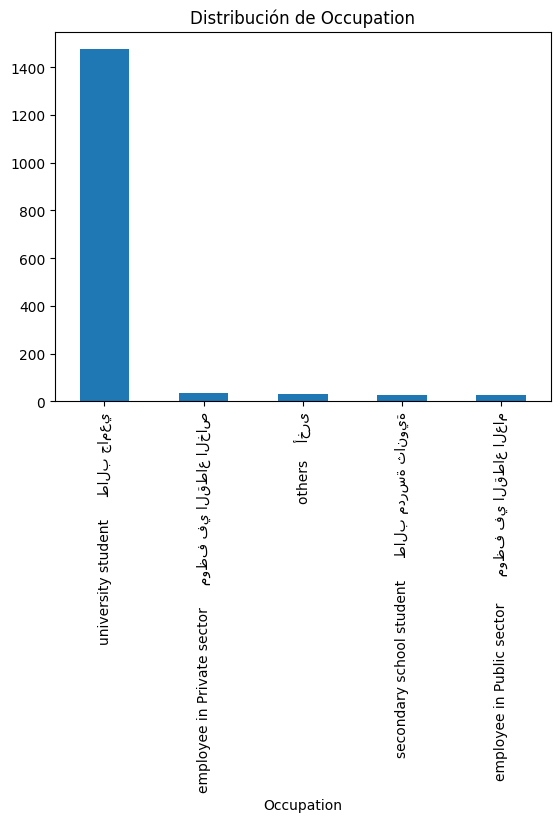


Frecuencia de valores en Do you drink coffee daily?:
Do you drink coffee daily?
No    لا                                                                  789
Yes, 1-2 cups daily                   نعم, من فنجان الى فنجانين يومياً    604
Yes, 2-3 cups daily  نعم من 2-3 فناجين يومياُ                             109
Yes, 3-4 cups daily                   نعم, من 3 الى 4 فناجين يومياً        61
Yes, more than 4 cups daily   نعم, أكثر من 4 فناجين يومياً                 34
Name: count, dtype: int64


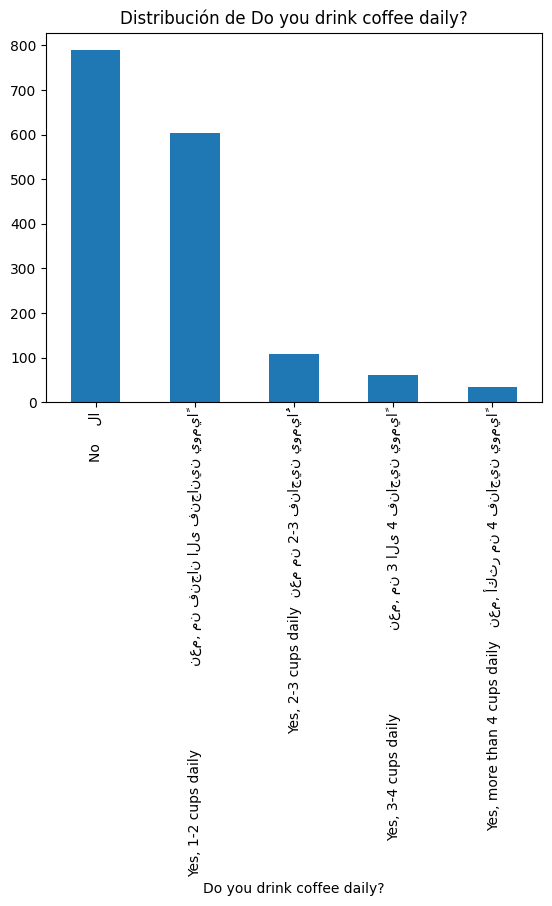


Frecuencia de valores en Do you drink energy drinks regularly?:
Do you drink energy drinks regularly?
No       لا    1288
Yes     نعم     309
Name: count, dtype: int64


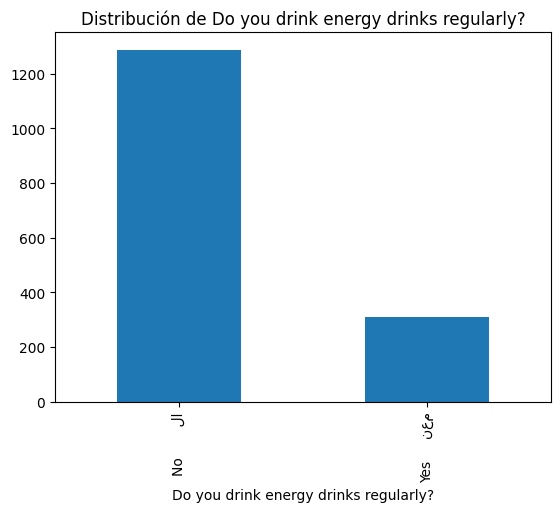


Frecuencia de valores en Have you been diagnosed by a dentist with bruxism?:
Have you been diagnosed by a dentist with bruxism?
No sabe / No responde    1288
no                        249
sí                         60
Name: count, dtype: int64


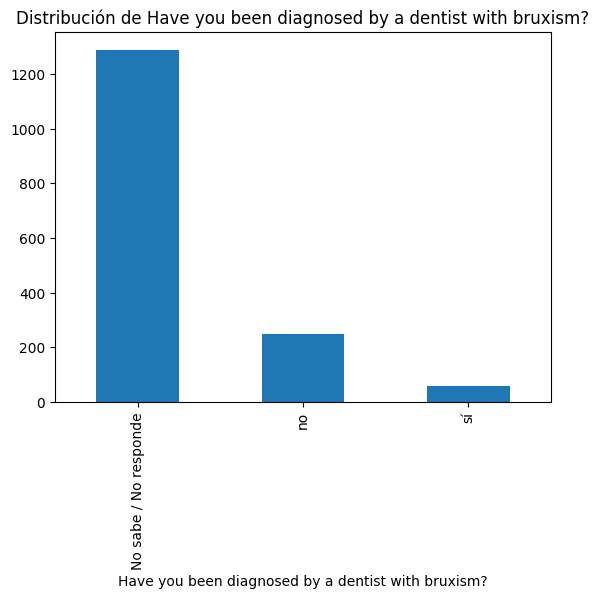

In [40]:
# Recorremos las variables categóricas
categorical_cols = ['Occupation', 'Do you drink coffee daily?',
                    'Do you drink energy drinks regularly?',
                    'Have you been diagnosed by a dentist with bruxism?']

for col in categorical_cols:
    print(f"\nFrecuencia de valores en {col}:")
    print(clean_df[col].value_counts(dropna=False))
    clean_df[col].value_counts().plot(kind='bar', title=f"Distribución de {col}")
    plt.show()

##### Figura 2

In [83]:
# Ejemplo: combinaciones de diagnóstico y consumo
cross = clean_df.groupby(['Do you drink energy drinks regularly?', 'Have you been diagnosed by a dentist with bruxism?']).size().reset_index(name='count')
print(cross)

# Ordenar por frecuencia
cross.sort_values('count', ascending=True, inplace=True)
print("\nCombinaciones menos frecuentes:")
pd.DataFrame(cross.head())

  Do you drink energy drinks regularly?  \
0                           No       لا   
1                           Yes     نعم   
2                           Yes     نعم   

  Have you been diagnosed by a dentist with bruxism?  count  
0                              No sabe / No responde   1288  
1                                                 no    249  
2                                                 sí     60  

Combinaciones menos frecuentes:


,Do you drink energy drinks regularly?,Have you been diagnosed by a dentist with bruxism?,count
2,Yes نعم,sí,60
1,Yes نعم,no,249
0,No لا,No sabe / No responde,1288


##### Figura 3

In [86]:
cross = clean_df.groupby(['Do you drink coffee daily?', 'Have you been diagnosed by a dentist with bruxism?']).size().reset_index(name='count')
print(cross)

cross.sort_values('count', ascending=True, inplace=True)
print("\nCombinaciones menos frecuentes:")
pd.DataFrame(cross)

                           Do you drink coffee daily?  \
0                                            No    لا   
1                                            No    لا   
2                                            No    لا   
3   Yes, 1-2 cups daily                   نعم, من ...   
4   Yes, 1-2 cups daily                   نعم, من ...   
5   Yes, 1-2 cups daily                   نعم, من ...   
6       Yes, 2-3 cups daily  نعم من 2-3 فناجين يومياُ   
7       Yes, 2-3 cups daily  نعم من 2-3 فناجين يومياُ   
8       Yes, 2-3 cups daily  نعم من 2-3 فناجين يومياُ   
9   Yes, 3-4 cups daily                   نعم, من ...   
10  Yes, 3-4 cups daily                   نعم, من ...   
11  Yes, 3-4 cups daily                   نعم, من ...   
12  Yes, more than 4 cups daily   نعم, أكثر من 4 ف...   
13  Yes, more than 4 cups daily   نعم, أكثر من 4 ف...   
14  Yes, more than 4 cups daily   نعم, أكثر من 4 ف...   

   Have you been diagnosed by a dentist with bruxism?  count  
0                       

,Do you drink coffee daily?,Have you been diagnosed by a dentist with bruxism?,count
14,"Yes, more than 4 cups daily نعم, أكثر من 4 ف...",sí,1
8,"Yes, 2-3 cups daily نعم من 2-3 فناجين يومياُ",sí,8
11,"Yes, 3-4 cups daily نعم, من ...",sí,9
13,"Yes, more than 4 cups daily نعم, أكثر من 4 ف...",no,11
10,"Yes, 3-4 cups daily نعم, من ...",no,13
2,No لا,sí,17
12,"Yes, more than 4 cups daily نعم, أكثر من 4 ف...",No sabe / No responde,22
7,"Yes, 2-3 cups daily نعم من 2-3 فناجين يومياُ",no,23
5,"Yes, 1-2 cups daily نعم, من ...",sí,25
9,"Yes, 3-4 cups daily نعم, من ...",No sabe / No responde,39


##### Figura 4

In [78]:
freq_ocupacion = pd.DataFrame({'Occupation': clean_df['Occupation'].value_counts(normalize=True) * 100})
freq_ocupacion

,Occupation
Occupation,
university student طالب جامعي,92.298059
employee in Private sector موظف في القطاع الخاص,2.254227
others أخرى,1.941140
secondary school student طالب مدرسة ثانوية,1.753287
employee in Public sector موظف في القطاع العام,1.753287


##### Figura 5

In [82]:
# 1. Seleccionar columnas de interés
columnas_combinacion = ['Occupation', 'How many cans you drink daily?']

# 2. Agrupar, contar y ordenar
combinaciones_raras = clean_df.groupby(columnas_combinacion).size().sort_values(ascending=True)

print("Las 10 combinaciones de datos más raras:")
pd.DataFrame(combinaciones_raras.head(10))

Las 10 combinaciones de datos más raras:


0
Occupation                                         How many cans you drink daily?                 
employee in Private sector     موظف في القطاع ا... 2 cans daily   علبتين يومياً                  1
                                                   more than 3 cans    أكثر من ثلاث علب يومياً   1
others    أخرى                                     2 cans daily   علبتين يومياً                  1
                                                   1 can daily   علبة واحدة يومياً               3
employee in Public sector      موظف في القطاع ا... 1 can daily   علبة واحدة يومياً               5
university student     طالب جامعي                  more than 3 cans    أكثر من ثلاث علب يومياً   6
employee in Private sector     موظف في القطاع ا... 1 can daily   علبة واحدة يومياً               7
secondary school student     طالب مدرسة ثانوية     1 can daily   علبة واحدة يومياً              10
university student     طالب جامعي                  3 cans daily   ثلاث علب يومياً               18
secondary school student     طالب مدرسة ثانوية     None       ولا واحدة                         18

##### Figura 6

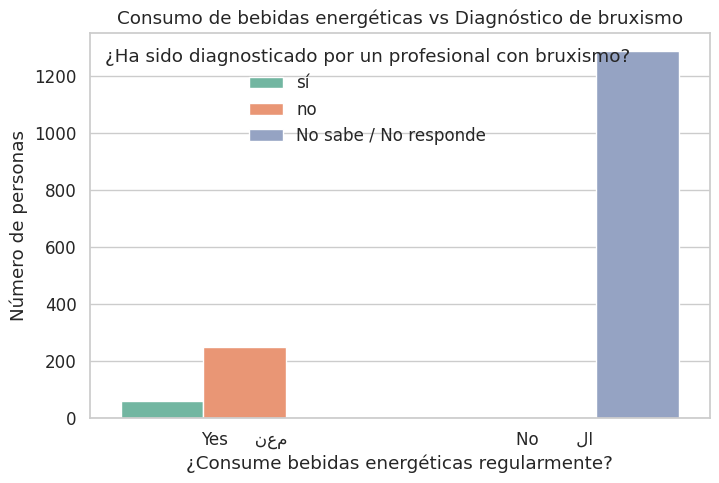

In [73]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=clean_df,
    x='Do you drink energy drinks regularly?',
    hue='Have you been diagnosed by a dentist with bruxism?'
)

plt.title('Consumo de bebidas energéticas vs Diagnóstico de bruxismo')
plt.xlabel('¿Consume bebidas energéticas regularmente?')
plt.ylabel('Número de personas')
plt.legend(title='¿Ha sido diagnosticado por un profesional con bruxismo?', loc="upper left")
plt.show()

##### Figura 7

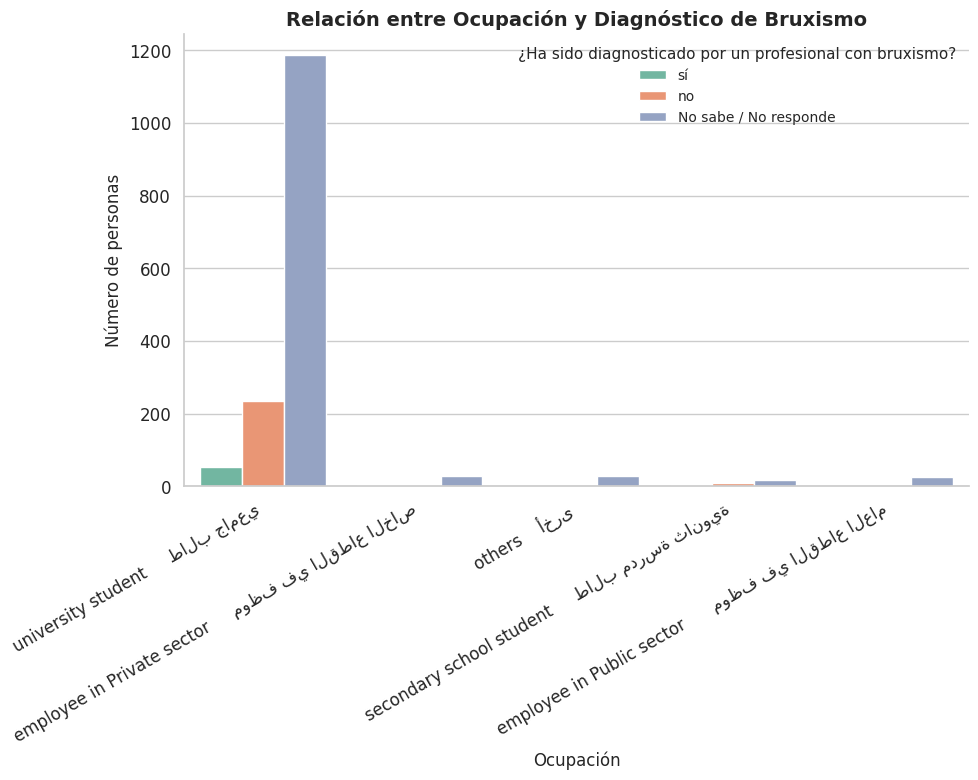

In [74]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

plt.figure(figsize=(10,8))  # Aumenta tamaño del gráfico

# Gráfico de barras agrupadas
sns.countplot(
    data=clean_df,
    x='Occupation',
    hue='Have you been diagnosed by a dentist with bruxism?',
    palette='Set2',
    order=clean_df['Occupation'].value_counts().index  # ordena por frecuencia
)

# Títulos y etiquetas
plt.title('Relación entre Ocupación y Diagnóstico de Bruxismo', fontsize=14, weight='bold')
plt.xlabel('Ocupación', fontsize=12)
plt.ylabel('Número de personas', fontsize=12)

# Rotar etiquetas del eje X para mejor lectura
plt.xticks(rotation=30, ha='right')

# Mejorar leyenda
plt.legend(title='¿Ha sido diagnosticado por un profesional con bruxismo?', title_fontsize=11, fontsize=10, loc='upper right')

# Quitar bordes innecesarios
sns.despine()

plt.tight_layout()
plt.show()

## 6. Conclusiones

•	La encuesta fue realizada principalmente a adultos jóvenes quienes en su mayoría se encuentran estudiando en la universidad.

•	Debido a la baja cantidad de encuestados que tienen una ocupación distinta a estudiante universitario (Como se observa en la grafica de barras de la figura 1), podemos decir que aquellos como “secondary school student” o “employee in public sector” pueden ser considerados atípicos debido a su baja cantidad de registros.

•	Tenemos una gran cantidad de datos faltantes en nuestra variable objetivo, lo cual nos puede llegar a generar problemas para realizar un análisis adecuado.

•	No podemos afirmar que el consumo de bebidas energéticas afecte de forma significativa con respecto al desarrollo del bruxismo, ya que no tenemos información de si las personas que no consumen bebidas energéticas de forma regular han sido o no diagnosticadas con bruxismo (Como se observa en la figura 2).

•	Son muy pocos los casos donde un entrevistado reporta beber una cantidad considerable de tazas de café y es diagnosticado con bruxismo.

A nivel generar, los resultados indican una ausencia de relación directa entre el consumo constante de bebidas energéticas y el diagnostico del bruxismo. Sin embargo, ese resultado puede verse sesgado debido falta de muchas respuestas en el campo de diagnóstico de bruxismo.
